In [1]:
from pathlib import Path
import itertools
import numpy as np
import matplotlib.pylab as plt
# %matplotlib nbagg
# %matplotlib inline
import h5py
import json
import pickle

## Loading files

In [2]:
## Read all the training data and labels from h5 files
file = r'C:\LINHC\VersucheDBs\Trelleborg\test\training.h5'
f = h5py.File(file, 'r')
print("ATTR:")
print(f.attrs.keys())
print("Keys:")
print(f.keys())

setup = f['setup']
s21 = f['liview']['s21']

dataset = []
for i in range(121):
    dataset.append(s21[i].real)
    dataset.append(s21[i].imag)
for value in setup.values():
    dataset.append(np.asarray(value))
    
X = np.asarray(dataset).T
y = np.asarray(f['ref']['pos1'])
print("X:")
print(X.shape)
print("y:")
print(y.shape)

ATTR:
<KeysViewHDF5 ['feature_lookup', 'name_lookup_rev']>
Keys:
<KeysViewHDF5 ['liview', 'ref', 'setup']>
X:
(92000, 246)
y:
(92000,)


In [4]:
json.loads(f.attrs["feature_lookup"])

{'s21-0-real': 0,
 's21-0-imag': 1,
 's21-1-real': 2,
 's21-1-imag': 3,
 's21-2-real': 4,
 's21-2-imag': 5,
 's21-3-real': 6,
 's21-3-imag': 7,
 's21-4-real': 8,
 's21-4-imag': 9,
 's21-5-real': 10,
 's21-5-imag': 11,
 's21-6-real': 12,
 's21-6-imag': 13,
 's21-7-real': 14,
 's21-7-imag': 15,
 's21-8-real': 16,
 's21-8-imag': 17,
 's21-9-real': 18,
 's21-9-imag': 19,
 's21-10-real': 20,
 's21-10-imag': 21,
 's21-11-real': 22,
 's21-11-imag': 23,
 's21-12-real': 24,
 's21-12-imag': 25,
 's21-13-real': 26,
 's21-13-imag': 27,
 's21-14-real': 28,
 's21-14-imag': 29,
 's21-15-real': 30,
 's21-15-imag': 31,
 's21-16-real': 32,
 's21-16-imag': 33,
 's21-17-real': 34,
 's21-17-imag': 35,
 's21-18-real': 36,
 's21-18-imag': 37,
 's21-19-real': 38,
 's21-19-imag': 39,
 's21-20-real': 40,
 's21-20-imag': 41,
 's21-21-real': 42,
 's21-21-imag': 43,
 's21-22-real': 44,
 's21-22-imag': 45,
 's21-23-real': 46,
 's21-23-imag': 47,
 's21-24-real': 48,
 's21-24-imag': 49,
 's21-25-real': 50,
 's21-25-i

In [5]:
json.loads(f.attrs["name_lookup_rev"])

{'t': 'Ist-Ablauf-Zeit, ca.',
 'tdf': 'Ist-MG1: Teller-Drehfrequenz [Hz]',
 'stdf': 'Soll-MG1: Teller-Drehfrequenz [Hz]',
 'k1t': 'Ist-MG2: Kammer1-Temp[°C]',
 'sk1t': 'Soll-MG2: Kammer1-Temp[°C]',
 'k1p': 'Ist-MG3: Kammer1-Druck[bar]',
 'sk1p': 'Soll-MG3: Kammer1-Druck[bar]',
 'k2t': 'Ist-MG4: Kammer2-Temp.[°C]',
 'sk2t': 'Soll-MG4: Kammer2-Temp.[°C]',
 'k2p': 'Ist-MG5: Kammer2-Druck[bar]',
 'sk2p': 'Soll-MG5: Kammer2-Druck[bar]',
 'k1f': 'Ist-MG6: Kammer1-Kraft[kN]',
 'sk1f': 'Soll-MG6: Kammer1-Kraft[kN]',
 'k2f': 'Ist-MG7: Kammer2-Kraft[kN]',
 'sk2f': 'Soll-MG7: Kammer2-Kraft[kN]',
 'k1at': 'Ist-MG8: Kammer1-Außentemp.[°C]',
 'sk1at': 'Soll-MG8: Kammer1-Außentemp.[°C]',
 'k2at': 'Ist-MG9: Kammer2-Außentemp.[°C]',
 'sk2at': 'Soll-MG9: Kammer2-Außentemp.[°C]',
 'pos1': 'Ist-MG10: Kammer1-Istpos.[mm]',
 'spos1': 'Soll-MG10: Kammer1-Istpos.[mm]',
 'pos2': 'Ist-MG11: Kammer2-Istpos.[mm]',
 'spos2': 'Soll-MG11: Kammer2-Istpos.[mm]',
 'hub1': 'Ist-MG12: Hub1[mm]',
 'shub1': 'Soll-MG12: Hub

## Plots to verify the training data

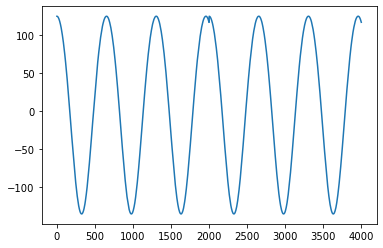

In [9]:
# y_test is not a sine wave because it's out of order and normalized.
plt.plot(y[-2000:])

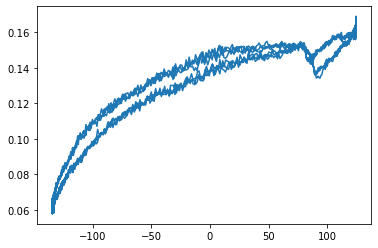

In [37]:
# s21 vs pos, freq 0,last lsa
%matplotlib inline
plt.plot(y[-2000:],np.sqrt(X.T[0][-2000:]**2+X.T[1][-2000:]**2))

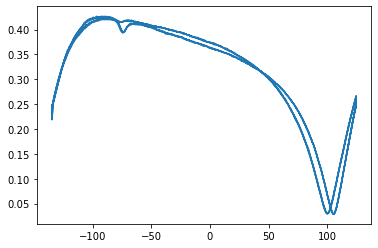

In [38]:
# s21 vs pos, freq 20, last lsa
plt.plot(y[-2000:],np.sqrt(X.T[20][-2000:]**2+X.T[21][-2000:]**2))

## Data preprocessing

something else for imaginary number? maybe add abs as well?

In [6]:
# split the data: training, 80%; test, 20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
# Normalization: std, 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# following codes have the same effect
# from sklearn import preprocessing
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

## Training

### Random Forest

In [8]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_scaled, y_train) # training time for 100 trees is approx. 30 mins

RandomForestRegressor()

In [10]:
# save the file
filename = './models/rf1'
pickle.dump(rf, open(filename, 'wb'))

In [41]:
# # load the model from disk
# filename = './models/rf1'
# loaded_model = pickle.load(open(filename, 'rb'))

In [11]:
rf.score(X_test_scaled, y_test)

0.9603270777044902

median of the errors:  7.987454464448035


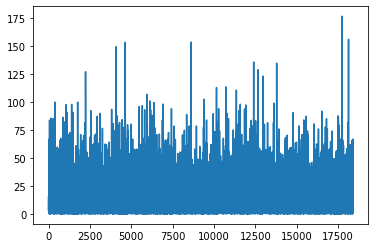

In [40]:
err = abs(rf.predict(X_test_scaled) - y_test)
print("median of the errors: ", np.median(err))
plt.plot(err)

In [13]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

In [14]:
feature_lookup_rev = {v: k for k, v in json.loads(f.attrs["feature_lookup"]).items()}
print("Feature ranking:")
for i in range(X_train_scaled.shape[1]):
    print("%d. feature %d, %s :(%f)" % 
          (i + 1, indices[i],feature_lookup_rev[indices[i]], importances[indices[i]]))

Feature ranking:
1. feature 1, s21-0-imag :(0.183719)
2. feature 245, k1t :(0.120804)
3. feature 244, k1at :(0.077230)
4. feature 106, s21-53-real :(0.061627)
5. feature 243, ip2k1 :(0.050636)
6. feature 101, s21-50-imag :(0.040004)
7. feature 51, s21-25-imag :(0.039223)
8. feature 17, s21-8-imag :(0.022431)
9. feature 95, s21-47-imag :(0.022298)
10. feature 9, s21-4-imag :(0.019950)
11. feature 102, s21-51-real :(0.018213)
12. feature 81, s21-40-imag :(0.017819)
13. feature 242, ip1k1 :(0.014465)
14. feature 105, s21-52-imag :(0.012926)
15. feature 94, s21-47-real :(0.012675)
16. feature 125, s21-62-imag :(0.011012)
17. feature 8, s21-4-real :(0.010620)
18. feature 10, s21-5-real :(0.010524)
19. feature 57, s21-28-imag :(0.010495)
20. feature 100, s21-50-real :(0.010249)
21. feature 124, s21-62-real :(0.009755)
22. feature 103, s21-51-imag :(0.008632)
23. feature 34, s21-17-real :(0.008534)
24. feature 126, s21-63-real :(0.007214)
25. feature 127, s21-63-imag :(0.007207)
26. feature 1

In [15]:
for i in range(X_train_scaled.shape[1]):
    if indices[i]>241:
        abbr = feature_lookup_rev[indices[i]]
        print("%d. %s, %s :(%f)" % 
              (i + 1, abbr,json.loads(f.attrs["name_lookup_rev"])[abbr], importances[indices[i]]))

2. k1t, Ist-MG2: Kammer1-Temp[°C] :(0.120804)
3. k1at, Ist-MG8: Kammer1-Außentemp.[°C] :(0.077230)
5. ip2k1, K1_ZWDD_Pos2_vorHF [bar] :(0.050636)
13. ip1k1, K1_ZWDD_Pos1_nachHF [bar] :(0.014465)


<IPython.core.display.Javascript object>


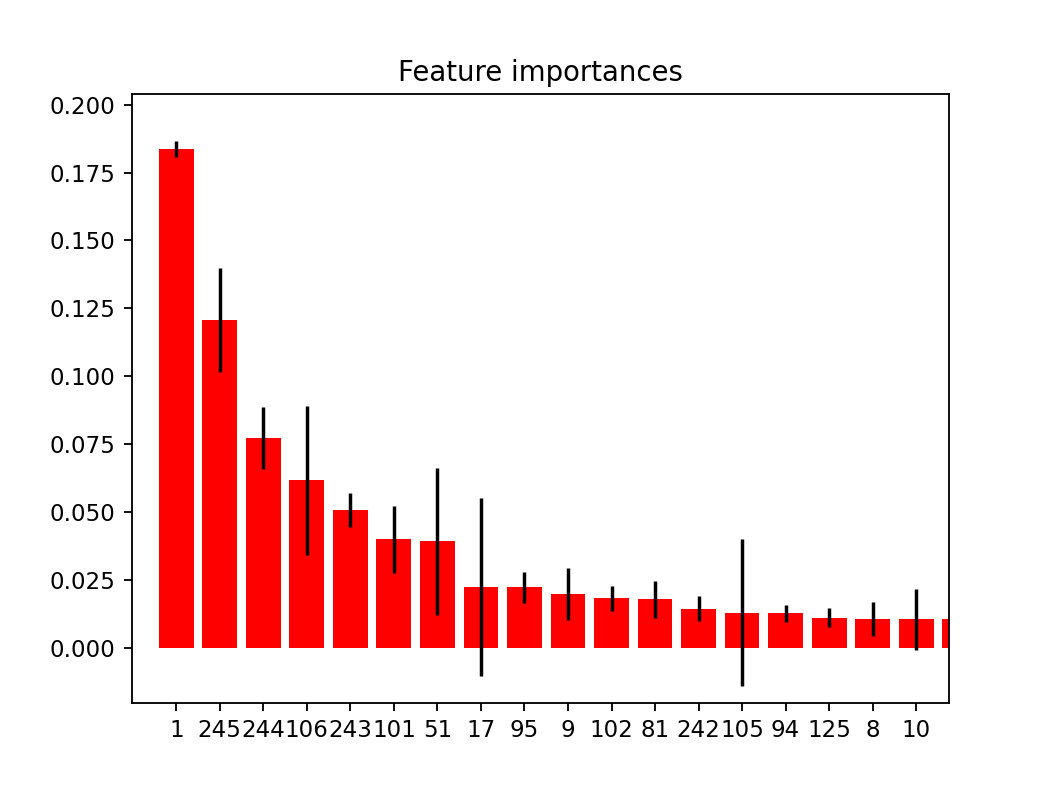

In [16]:
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# Plot the impurity-based feature importances of the forest
%matplotlib nbagg
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_scaled.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), indices)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.show()

In [30]:
f.close()

### NN